<a href="https://colab.research.google.com/github/072arushi/Bank-Loan-Prediction/blob/main/Bank_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
print('*All categorical features and their distinct values* \n')
for c in cat_features:
    
    print(c , ' --> ',df[c].unique())
    print()

*All categorical features and their distinct values* 

job  -->  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital  -->  ['married' 'single' 'divorced']

education  -->  ['secondary' 'tertiary' 'primary' 'unknown']

default  -->  ['no' 'yes']

housing  -->  ['yes' 'no']

loan  -->  ['no' 'yes']

contact  -->  ['unknown' 'cellular' 'telephone']

month  -->  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome  -->  ['unknown' 'other' 'failure' 'success']

deposit  -->  ['yes' 'no']



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [ ]:
#checking for NULL
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


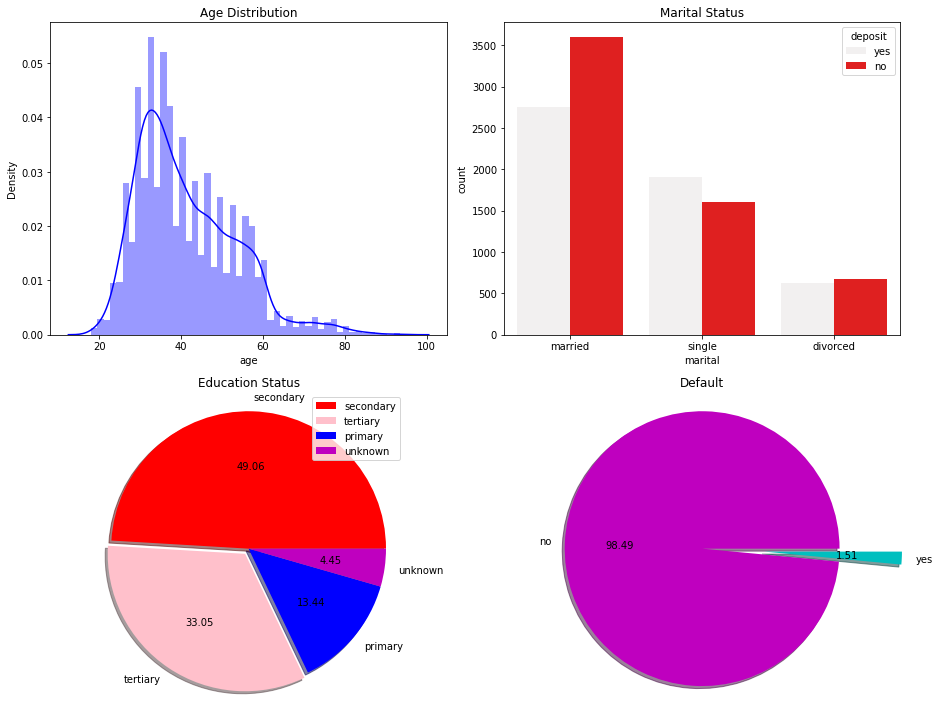

In [ ]:
plt.figure(figsize = (13 ,10))

plt.subplot(2,2,1)
sns.distplot(df['age'] ,color ='b')
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.countplot(df['marital'] ,hue =df['deposit'] ,color ='r')
plt.title('Marital Status')

plt.subplot(2,2,3)
plt.pie(df['education'].value_counts() ,labels =['secondary', 'tertiary', 'primary', 'unknown'],colors =['r','pink','b' ,'m'] ,autopct ='%.2f' ,explode =[0 ,0.05,0,0] ,shadow=.5 ,radius =1.1  )
plt.legend()
plt.title('Education Status'  )

plt.subplot(2,2,4)
plt.pie(df['default'].value_counts() ,labels =['no' ,'yes'],colors =['m' ,'c'] ,autopct ='%.2f' ,explode =[0 ,0.5] ,shadow=.5 ,radius =1.1  )
plt.title('Default')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


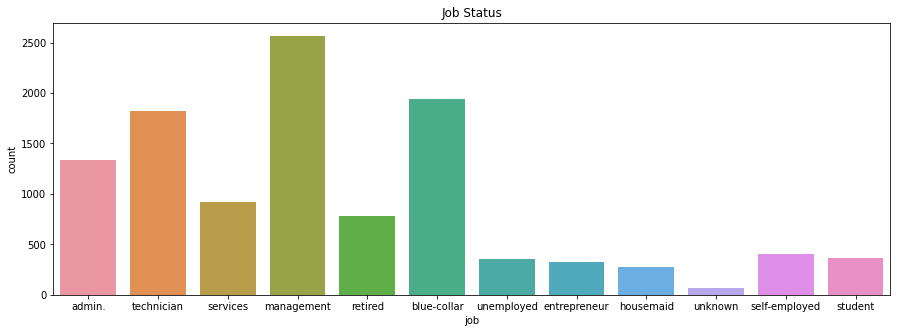

In [ ]:
plt.figure(figsize =(15 ,5))
plt.title('Job Status')
sns.countplot(df['job'])

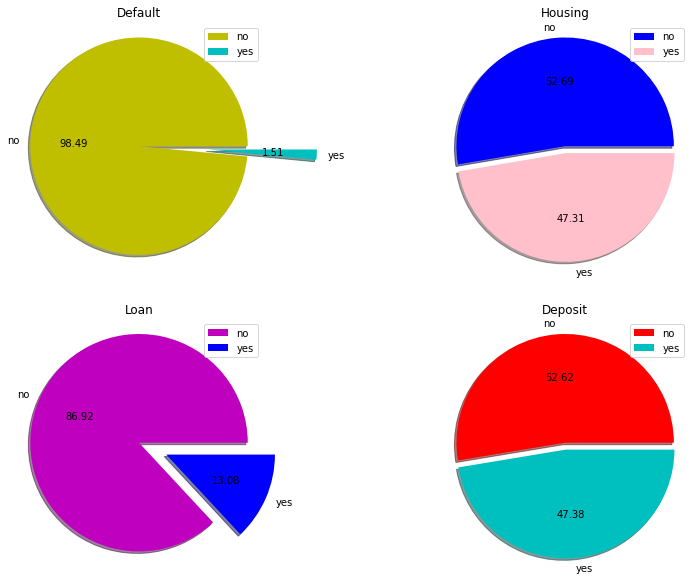

In [ ]:
plt.figure(figsize = (14 ,10))
plt.subplot(2,2,1)
plt.pie(df['default'].value_counts() ,colors =['y' ,'c'] ,explode =[0 ,0.7] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6 
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Default')
plt.legend()

plt.subplot(2,2,2)
plt.pie(df['housing'].value_counts() ,colors =['b' ,'pink'] ,explode =[0 ,0.07] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6 
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Housing')
plt.legend()

plt.subplot(2,2,3)
plt.pie(df['loan'].value_counts() ,colors =['m' ,'b'] ,explode =[0 ,0.3] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Loan')
plt.legend()

plt.subplot(2,2,4)
plt.pie(df['deposit'].value_counts() ,colors =['r' ,'c'] ,explode =[0 ,0.07] ,autopct ='%.2f'  
        ,shadow = True,pctdistance =0.6
,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Deposit')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Education Distribution with Deposit')

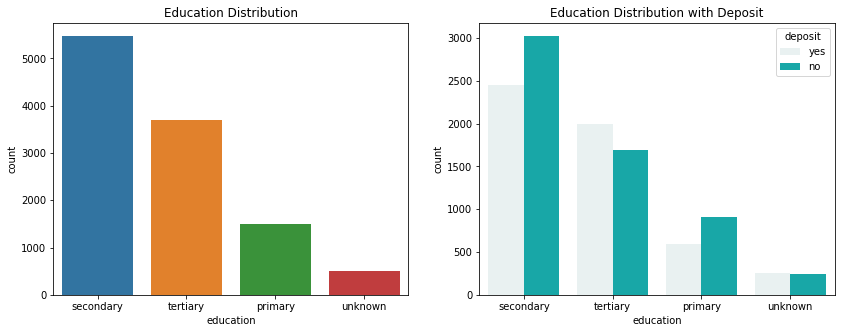

In [ ]:
plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
plt.title('Education Distribution')
sns.countplot(df['education'])
plt.subplot(1 ,2,2)
sns.countplot(df['education'] ,hue =df['deposit'] ,color = 'c')
plt.title('Education Distribution with Deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


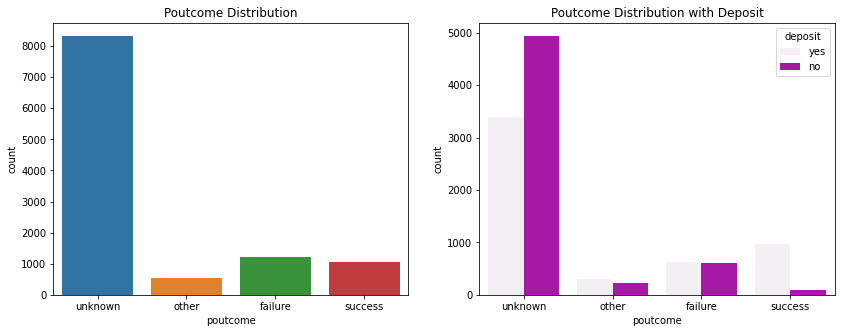

In [ ]:
plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
plt.title('Poutcome Distribution')
sns.countplot(df['poutcome'])
plt.subplot(1,2,2)
plt.title('Poutcome Distribution with Deposit')
sns.countplot(df['poutcome'] ,hue =df['deposit'] ,color ='m' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


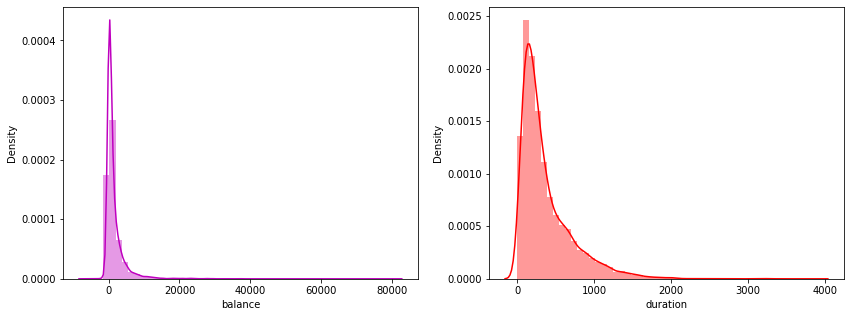

In [ ]:
plt.figure(figsize = (14 ,5))
plt.subplot(1,2,1)
sns.distplot(df['balance'],color ='m')
plt.subplot(1,2,2)
sns.distplot(df['duration'] ,color ='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Campaign Distribution with Deposit')

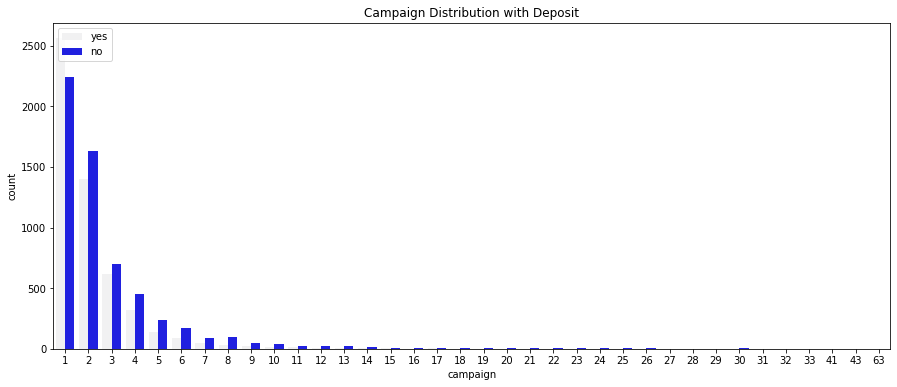

In [ ]:
plt.figure(figsize =(15 , 6))
sns.countplot(df['campaign'], hue=df['deposit'] ,color ='b')
plt.legend()
plt.title('Campaign Distribution with Deposit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Month Distribution with Deposit')

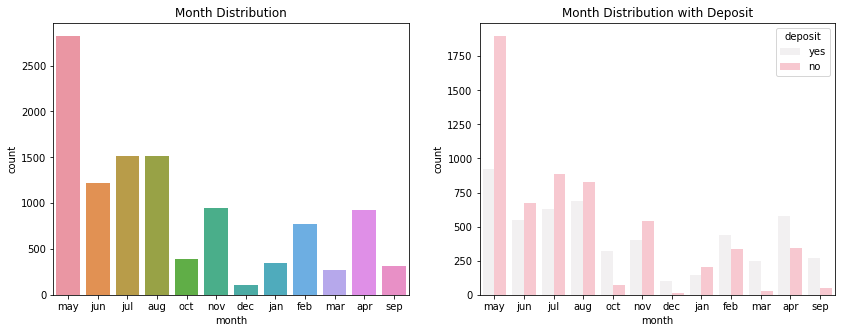

In [ ]:
plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
sns.countplot(df['month'])
plt.title('Month Distribution')
plt.subplot(1 ,2,2)
sns.countplot(df['month'] ,hue =df['deposit'] ,color ='pink')
plt.title('Month Distribution with Deposit')

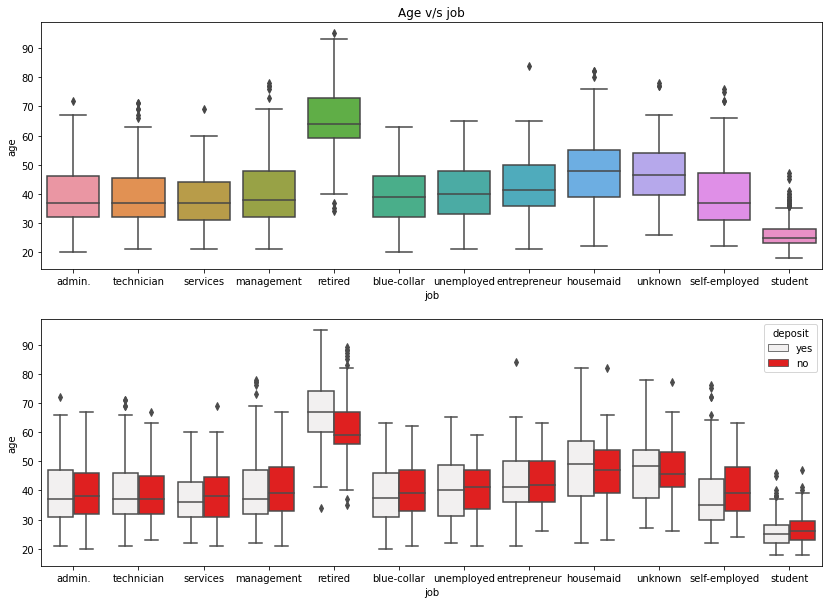

In [ ]:
plt.figure(figsize =(14,10))
plt.subplot(2,1,1)
sns.boxplot(x= df['job'] ,y=df['age'])
plt.title('Age v/s job')
plt.subplot(2,1,2)
sns.boxplot(x= df['job'] ,y=df['age'] ,hue =df['deposit'] ,color ='r')

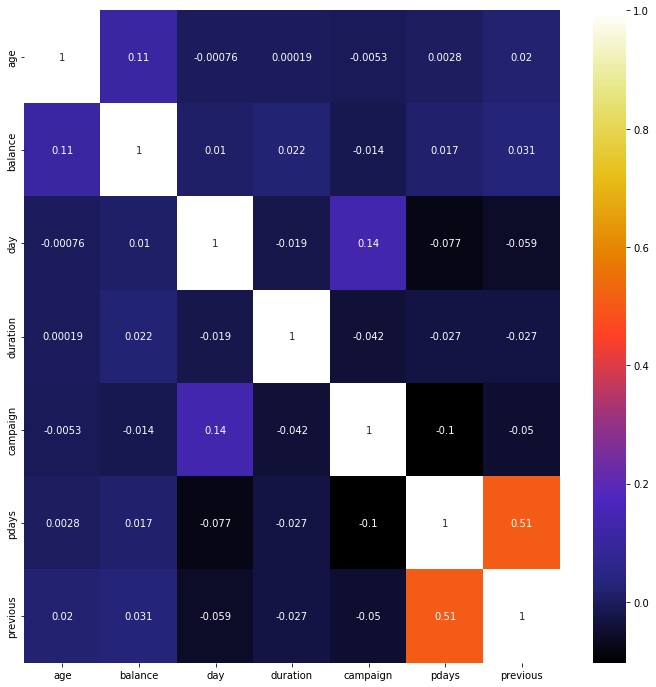

In [ ]:
#corelation matrix
plt.figure(figsize = (12,12))
correlation = df.corr()
sns.heatmap(correlation ,annot =True ,cmap ='CMRmap' )

In [ ]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df2.groupby(['deposit' ,'default']).size()
#so dropping default as no imp role
#most of its values are no 

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [ ]:
df2.groupby(['deposit' ,'pdays']).size()
#similarly pdays also has no significance 
#most of its values are -1

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [ ]:
df2.drop(columns =['default' ,'pdays'] ,axis =1 ,inplace = True)

In [ ]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [ ]:
#handling outliers 
df2.groupby('age' ,sort= True)['age'].count()
#these can be ignored and values lies b/w 18 - 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [ ]:
df2.groupby(['deposit' ,'balance'],sort = True)['balance'].count()
#need not to be remoevd as blaance gets higher ,client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [ ]:
df2.groupby(['deposit' ,'duration'],sort = True)['duration'].count()
#should not be removed as with increase in duration the client shows more interest in deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [ ]:
df2.groupby(['deposit' ,'campaign'],sort = True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [ ]:
#removing outliers
df3 = df2[df2['campaign'] <32]
df3.groupby(['deposit' ,'campaign'] ,sort = True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7          

In [ ]:
df3.groupby(['deposit' ,'previous'] ,sort= True)['previous'].count()

deposit  previous
no       0           4934
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3383
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [ ]:
#removing outliers 
df4 = df3[df3['previous'] <31]

In [ ]:
df4.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')

In [ ]:
cat_cols = ['job', 'marital', 'education' ,'contact', 'month','poutcome']
for  col in cat_cols:
    df4 =pd.concat([df4.drop(col,axis =1) ,pd.get_dummies(df4[col] ,prefix =col ,drop_first=True ,dummy_na = False)],axis = 1)

In [ ]:
#BOOLEAN TYPE FEATURES (YES /NO)
boolean_cols =['housing', 'loan','deposit']
for col in boolean_cols:
    df4[col +'_new']  =df4[col].apply(lambda x :1 if x =='yes' else 0)
    df4.drop(col ,axis =1 ,inplace = True)

In [ ]:
df4

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11158,39,733,16,83,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11159,32,29,19,156,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11160,43,0,8,9,2,5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df4.deposit_new

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_new, Length: 11150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x= df4.drop(['deposit_new'],axis =1)
y= df4['deposit_new']
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size = 0.2 , random_state = 51)

In [ ]:
print(len(x_train) ,len(x_test))

8920 2230


In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train= sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.14786208, -0.4623037 , -1.02368078, ...,  0.58356408,
         1.06224777, -0.38452233],
       [-1.19105183, -0.18122141,  0.88111474, ...,  0.58356408,
        -0.94139996, -0.38452233],
       [ 0.39606833, -0.27026182, -0.07128302, ...,  0.58356408,
         1.06224777, -0.38452233],
       ...,
       [-0.68985599,  0.03005568, -1.38082994, ..., -1.71360786,
         1.06224777, -0.38452233],
       [-0.85692127, -0.56344368,  0.16681642, ...,  0.58356408,
         1.06224777, -0.38452233],
       [ 0.06193777,  1.16989711,  0.76206502, ..., -1.71360786,
         1.06224777, -0.38452233]])

In [ ]:
#using k cross fold validation for model selection 
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
rf_model_scores = cross_val_score(estimator=RandomForestClassifier() ,X=x_train ,y= y_train,cv =5)
print(rf_model_scores)
print(rf_model_scores.mean())

[0.84136771 0.85257848 0.85930493 0.84248879 0.84248879]
0.847645739910314


In [ ]:
xg_model_scores = cross_val_score(estimator=XGBClassifier() ,X=x_train ,y= y_train,cv =5)
print(xg_model_scores)
print(xg_model_scores.mean())

[0.83856502 0.84304933 0.8514574  0.84585202 0.83744395]
0.8432735426008968


In [ ]:
model_params = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':
        {'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(2,4,1),
         'max_features':['auto' ,'log2']
        }
    },
    
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1 ,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10 ,50,100,200]        
        }
    } 
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator=mp['model'] ,param_grid=mp['param'] ,cv =5 ,return_train_score=False)
    model_sel.fit(x,y)
    scores.append(
    {
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })

In [ ]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7385650224215248,
  'best_params': {'criterion': 'entropy',
   'max_depth': 2,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.8148878923766816,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}]

In [ ]:
xgmodel = XGBClassifier(objective='binary:logistic' ,learning_rate =0.1 ,max_depth=10 ,n_estimators=100)
xgmodel.fit(x_train , y_train)
print('XGBModel Score is :')
xgmodel.score(x_test ,y_test)

XGBModel Score is :


0.8623318385650224

In [ ]:
cols = [ 'feature_name','score']
#decending sort
values = sorted(zip(x.columns ,xgmodel.feature_importances_) ,key =lambda x :x[1]*-1)

all_feature_imp = pd.DataFrame(values ,columns= cols)
all_feature_imp.head()

,feature_name,score
0,poutcome_success,0.173972
1,contact_unknown,0.127899
2,month_mar,0.071036
3,duration,0.047820
4,housing_new,0.038266


Text(0.5, 0, 'Features')

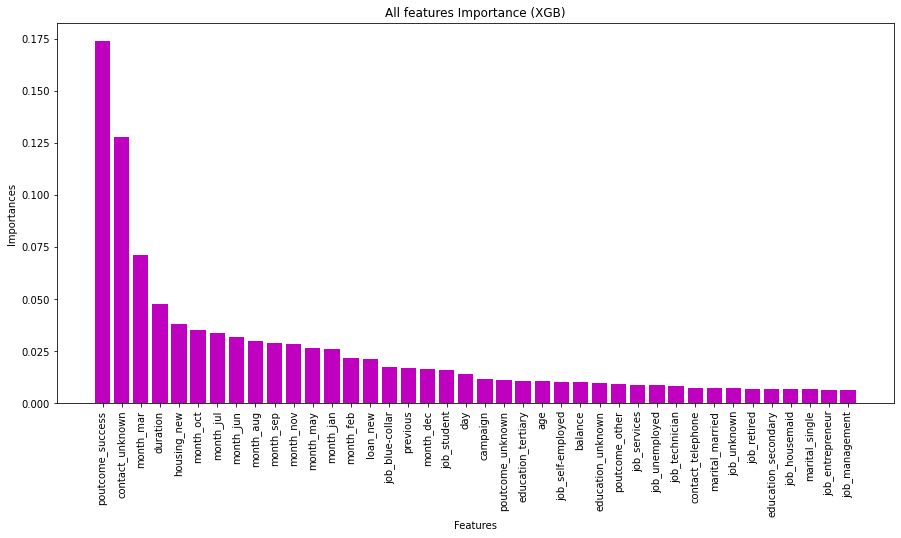

In [ ]:
plt.figure(figsize =(15 ,7))
x_pos = np.arange(0 ,len(all_feature_imp))
plt.bar(x_pos ,all_feature_imp['score'] ,color ='m')
plt.xticks(x_pos , all_feature_imp['feature_name'] ,rotation = 90)
plt.title('All features Importance (XGB)')
plt.ylabel('Importances')
plt.xlabel('Features')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,xgmodel.predict(x_test))
cm

array([[999, 200],
       [107, 924]])

Text(33.0, 0.5, 'True Value')

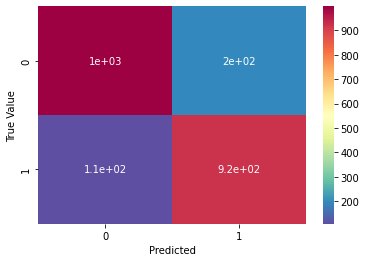

In [ ]:
sns.heatmap(cm ,annot = True ,cmap ='Spectral_r')
plt.xlabel('Predicted')
plt.ylabel('True Value')